In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import filters
from skimage.color import rgb2gray

In [4]:
# Helper function
def plot_image(img, title, cmap=None):
    plt.figure(figsize=(8, 6))
    plt.imshow(img, cmap=cmap)
    plt.title(title)
    plt.axis('off')
    plt.show()

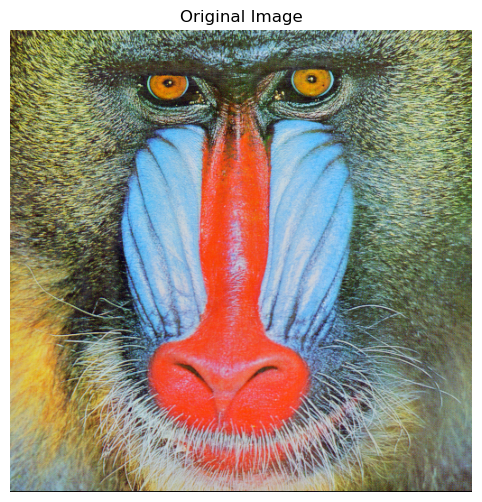

In [5]:
# 1. Load image
try:
    image = cv2.imread('baboon.png')
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
except:
    # Create sample image if baboon.png not found
    image = np.random.randint(0, 256, (300, 300, 3), dtype=np.uint8)

plot_image(image, "Original Image")


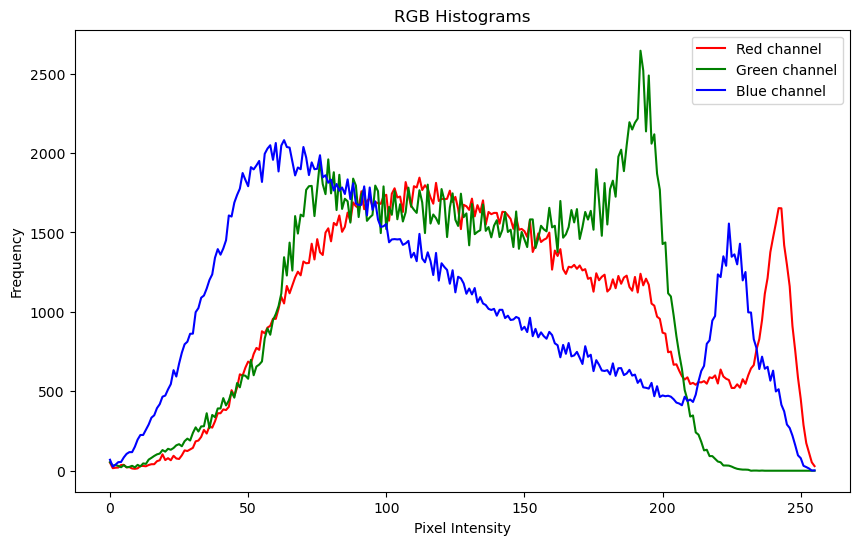

In [6]:
# 2. RGB Histograms
plt.figure(figsize=(10, 6))
colors = ['red', 'green', 'blue']
for i, color in enumerate(colors):
    hist = cv2.calcHist([image], [i], None, [256], [0, 256])
    plt.plot(hist, color=color, label=f'{color.capitalize()} channel')

plt.title('RGB Histograms')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.legend()
plt.show()

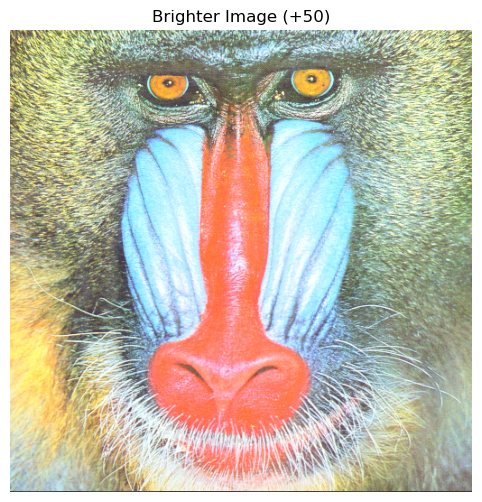

In [7]:
# 3. Brightness adjustment
bright_image = cv2.add(image, np.ones(image.shape, dtype=np.uint8) * 50)
plot_image(bright_image, "Brighter Image (+50)")

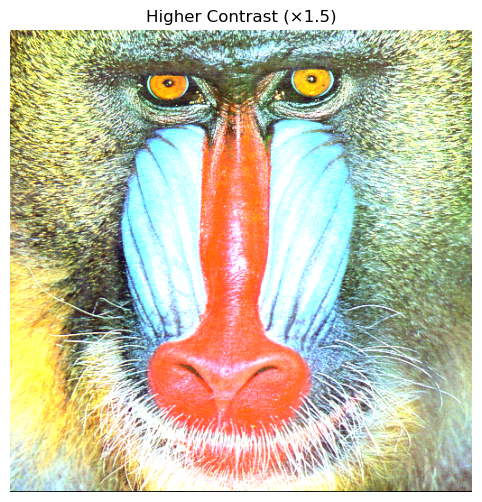

In [8]:
# 4. Contrast adjustment
contrast_image = cv2.convertScaleAbs(image, alpha=1.5, beta=0)
plot_image(contrast_image, "Higher Contrast (×1.5)")


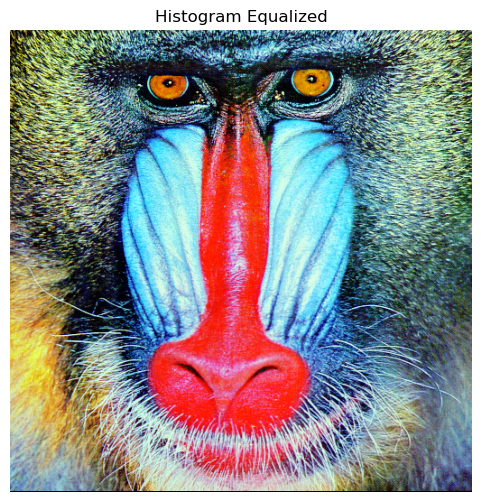

In [9]:
# 5. Histogram Equalization
def equalize_rgb(img):
    r, g, b = cv2.split(img)
    r_eq = cv2.equalizeHist(r)
    g_eq = cv2.equalizeHist(g)
    b_eq = cv2.equalizeHist(b)
    return cv2.merge([r_eq, g_eq, b_eq])

eq_image = equalize_rgb(image)
plot_image(eq_image, "Histogram Equalized")

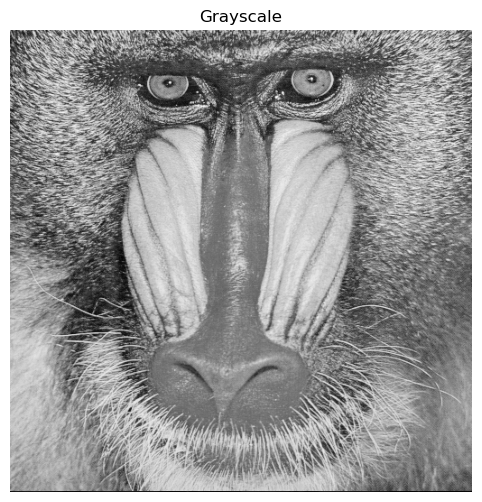

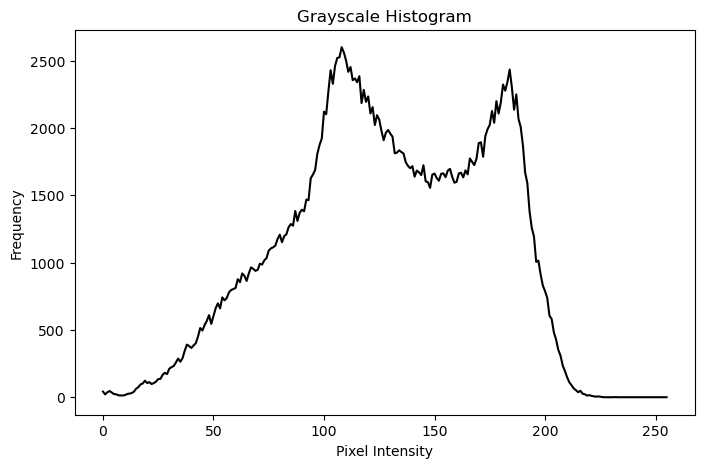

In [10]:
# 6. Convert to grayscale
gray = rgb2gray(image)
gray = (gray * 255).astype(np.uint8)
plot_image(gray, "Grayscale", cmap='gray')

# Grayscale histogram
plt.figure(figsize=(8, 5))
hist = cv2.calcHist([gray], [0], None, [256], [0, 256])
plt.plot(hist, color='black')
plt.title('Grayscale Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

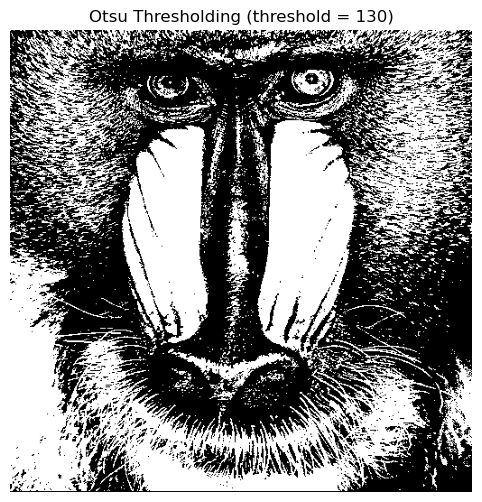

Done! All transformations completed.


In [11]:
# 7. Otsu's Thresholding
threshold = filters.threshold_otsu(gray)
binary = gray > threshold

plot_image(binary, f"Otsu Thresholding (threshold = {threshold:.0f})", cmap='gray')

print("Done! All transformations completed.")